In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear")   # OvR
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
log_reg.score(X_test, y_test)

0.6578947368421053

In [16]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


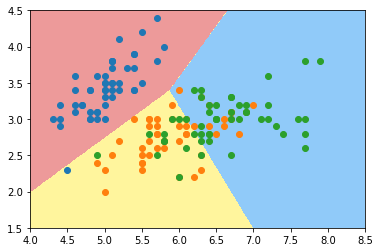

In [18]:
plot_desicion_boundry(log_reg, [4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [19]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")  # OvO
log_reg2.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [20]:
log_reg2.score(X_test, y_test)

0.7894736842105263

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


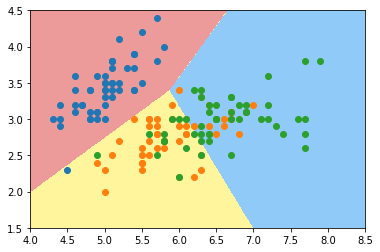

In [23]:
plot_desicion_boundry(log_reg2, [4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# all data

In [26]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [30]:
log_reg = LogisticRegression(solver="liblinear")  # OvR
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9473684210526315

In [29]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")  # OvO
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

# OvR OvO

In [31]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

In [32]:
from sklearn.multiclass import OneVsOneClassifier
ovr = OneVsOneClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

1.0